Todas as importações para o codigo

In [ ]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf

lê o dataframe, não utiliza a primeira coluna como index, armazena na variavel (dataFrame)

In [ ]:
dataFrame = pd.read_csv( "Red.csv", index_col= False )

inserimos uma nova informação ao dataframe

In [ ]:
nova_linha = pd.DataFrame({
    "Name": [""],
    "Country" : ["unknown"],
    "Region": ["unknown"],
    "Winery": ["unknown"],
    "Rating": [dataFrame['Rating'].mean()],
    "NumberOfRatings": [""],
    "Price": [dataFrame['Price'].mean()],
    "Year": ["2023"]
})

dataFrame = dataFrame.append(nova_linha, ignore_index=True)

<ipython-input-3-96e5423ba150>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataFrame = dataFrame.append(nova_linha, ignore_index=True)


In [ ]:
dataFrame

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019


ele retornará um objeto de índice do pandas contendo os rótulos das linhas no DataFrame.

In [ ]:
dataFrame.index

RangeIndex(start=0, stop=8667, step=1)

verifica no dataframe se temos alguma informação como null, tranformando em True as Null, e False as não Null (True = 1, False = 0) e somando as informações.

In [ ]:
dataFrame.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64

Transforma as informaçoes da coluna para numerico, caso não tenha como transforma para NaN (Not a Number), e faz o calculo para descobrir a idade o vinho, utilizando o ano atual menos o ano do vinho.

In [ ]:
dataFrame['Year'] = pd.to_numeric(dataFrame['Year'], errors='coerce')
dataFrame['Year'] = 2023 - dataFrame['Year']

cria variaveis com OrdinalEncoder, utilizado para converter infomarção em numerico.

(poderia ter sido utilizado apenas uma variavel para estes encoders, criando um encoder geral, e criando uma variavel lista com as colunas na qual seria modificado)

In [ ]:
Country_encoder = OrdinalEncoder()
Region_encoder = OrdinalEncoder()
Winery_encoder = OrdinalEncoder()

fit_transform é usado para ajustar o encoder aos valores únicos nas colunas e transformar esses valores em inteiros codificados.
.values.reshape(-1, 1) é utilizado para converter a coluna em uma matriz 2D (necessário para que fit_transform funcione). -1 significa "inferir o tamanho" e 1 significa uma coluna.

In [ ]:
dataFrame['Country'] = Country_encoder.fit_transform(dataFrame['Country'].values.reshape(-1,1))
dataFrame['Region'] = Region_encoder.fit_transform(dataFrame['Region'].values.reshape(-1,1))
dataFrame['Winery'] = Winery_encoder.fit_transform(dataFrame['Winery'].values.reshape(-1,1))

novamente verifica se temos alguma informação como null, agora temos 8 em Year

In [ ]:
dataFrame.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               8
dtype: int64

remove aqueles que na coluna Year possuem valores NaN

In [ ]:
dataFrame = dataFrame.dropna(subset=['Year'])

Cria o grafico de calor, utilizando o metodo de Pearson
utilizado para verificar qual informação mais afeta no resultado.

<ipython-input-12-649b1c0eae8e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataFrame.corr(method = 'spearman'), annot = True )


<Axes: >

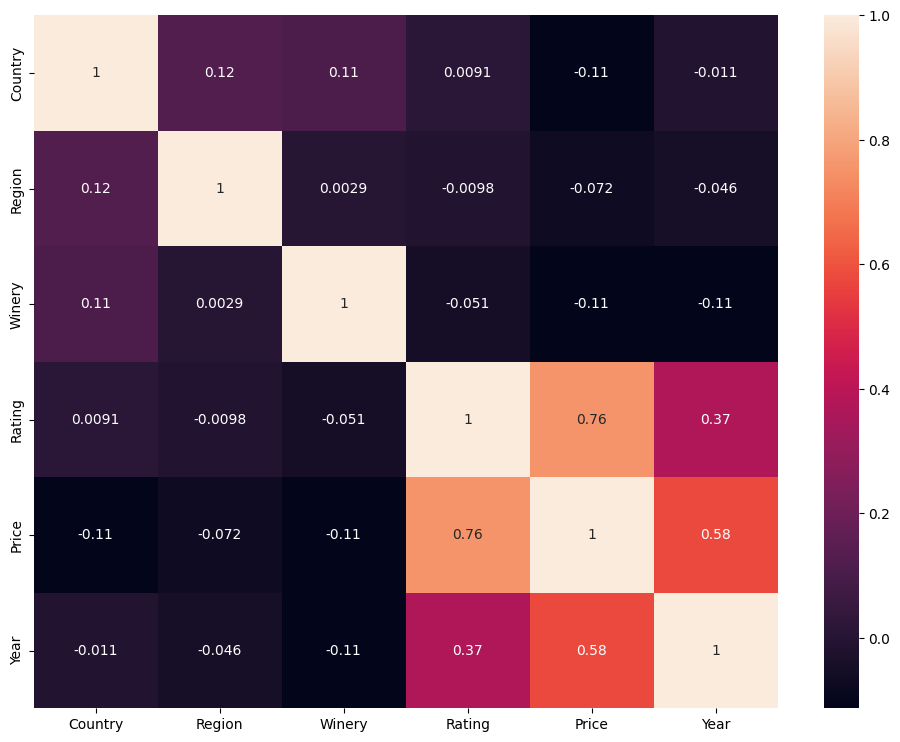

In [ ]:
a4_dim = (12, 9)
fig, ax = plt.subplots(figsize = a4_dim)
sns.heatmap(dataFrame.corr(method = 'spearman'), annot = True )

Dropamos a colunas 'Name','NumberOfRatings' diretamento no dataFrame

In [ ]:
dataFrame.drop(['Name','NumberOfRatings'], axis=1, inplace=True )

<ipython-input-13-3ba1c03e385d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame.drop(['Name','NumberOfRatings'], axis=1, inplace=True )


<Axes: xlabel='Country'>

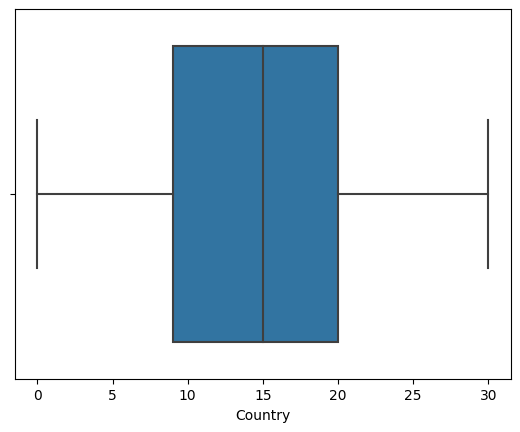

In [ ]:
sns.boxplot(x=dataFrame['Country'])

<Axes: xlabel='Region'>

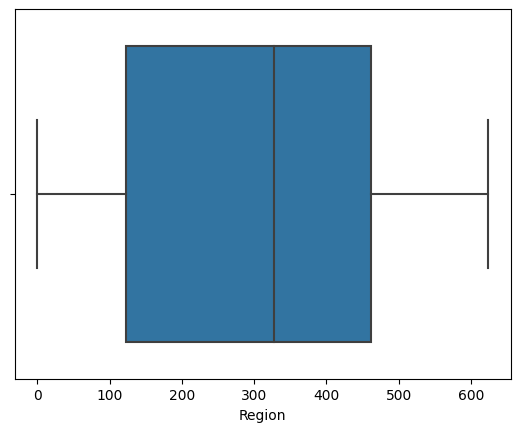

In [ ]:
sns.boxplot(x=dataFrame['Region'])

<Axes: xlabel='Winery'>

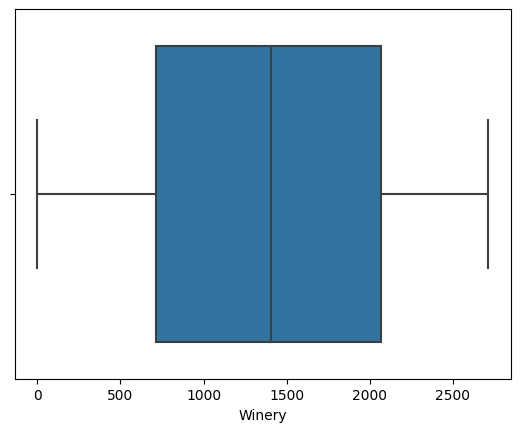

In [ ]:
sns.boxplot(x=dataFrame['Winery'])

<Axes: xlabel='Year'>

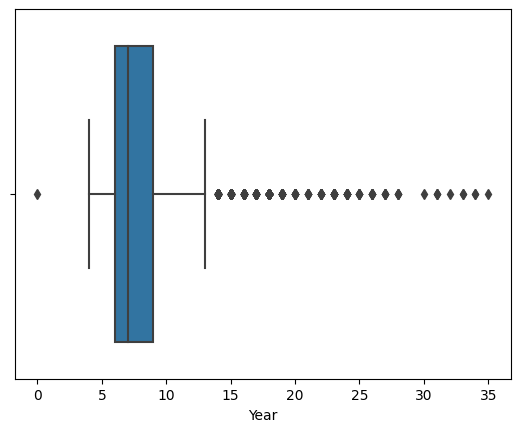

In [ ]:
sns.boxplot(x=dataFrame['Year'])

<Axes: xlabel='Rating'>

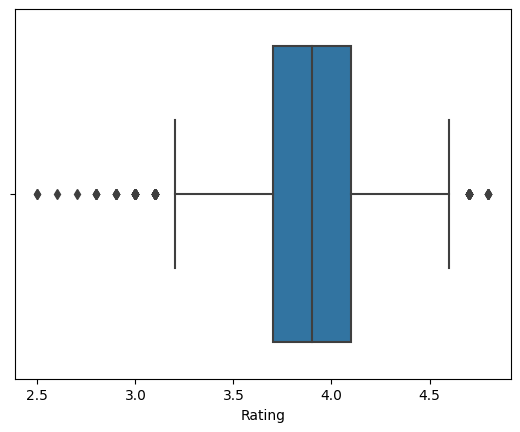

In [ ]:
sns.boxplot(x=dataFrame['Rating'])

<Axes: xlabel='Price'>

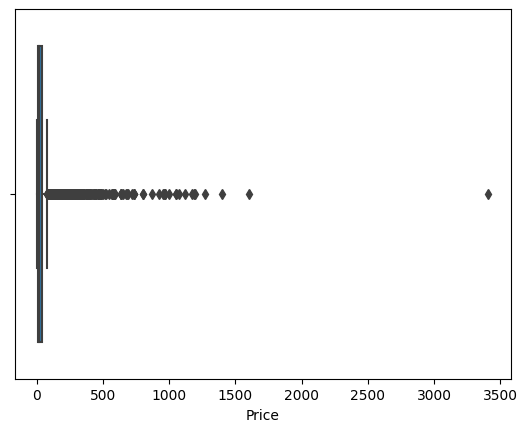

In [ ]:
sns.boxplot(x=dataFrame['Price'])

levando em cosideração o grafico acima, verificamos qual o preço

In [ ]:
dataFrame['Price'].max()

3410.79

agora verificamos as informções sobre o mesmo

In [ ]:
indice_max_valor = dataFrame['Price'].idxmax()
linha_max_valor = dataFrame.loc[indice_max_valor]
linha_max_valor

Country       9.00
Region      408.00
Winery     2119.00
Rating        4.70
Price      3410.79
Year         11.00
Name: 2344, dtype: float64

comparamos com o maior Rating do dataframe, e no caso o com maior valor não é o com maior rating

In [ ]:
dataFrame['Rating'].max()

4.8

Cria um filtro com as 99.99% das informações da coluna Price do dataframe

In [ ]:
hi_filter = dataFrame['Price'].quantile(0.9999)
hi_filter

1842.9647279974652

Passamos a coluna Price pelo filtro

In [ ]:
dataFrame = dataFrame[(dataFrame['Price']<hi_filter)]

<Axes: xlabel='Price'>

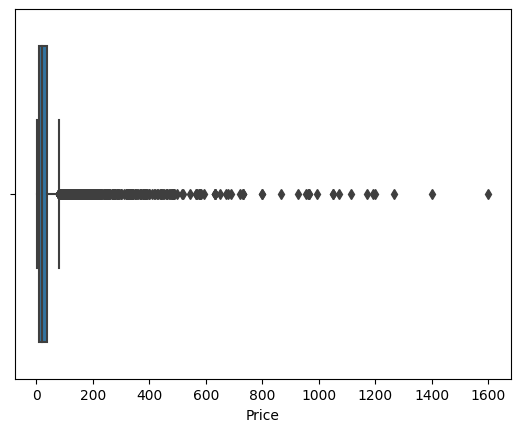

In [ ]:
sns.boxplot(x=dataFrame['Price'])

xInput = dataFrame.drop('Rating', axis=1):

Cria um novo DataFrame chamado xInput excluindo a coluna 'Rating' do DataFrame original.
axis=1 indica que a remoção deve ser feita ao longo das colunas.
yOutput = dataFrame['Rating']:

Cria uma Série chamada yOutput que contém apenas a coluna 'Rating' do DataFrame original.

In [ ]:
xInput = dataFrame.drop('Rating', axis=1)
yOutput = dataFrame['Rating']

separando em treino e teste, 30% dos dados serão usados como conjunto de teste e 70% como conjunto de treinamento

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xInput, yOutput, test_size=0.3, random_state=50)

In [ ]:
x_train, x_test, y_train, y_test

(      Country  Region  Winery   Price  Year
 2750     25.0   159.0  2502.0   35.99   7.0
 7079     15.0   275.0  1405.0  212.43  12.0
 3508     15.0   577.0  2701.0    6.97   6.0
 5478      9.0   234.0   905.0   49.95  18.0
 1304      3.0   211.0  1718.0   14.50  13.0
 ...       ...     ...     ...     ...   ...
 8271      9.0   269.0  1172.0   23.20   6.0
 6223      0.0   322.0   250.0    5.46   4.0
 8333      9.0   392.0   778.0  160.84   6.0
 6262     25.0   550.0  1348.0   13.15   9.0
 5608     15.0   497.0  1062.0   26.90   7.0
 
 [6060 rows x 5 columns],
       Country  Region  Winery   Price  Year
 2836     25.0   560.0  2012.0    6.30  13.0
 7423     15.0    58.0  1105.0   11.90  10.0
 6507      9.0   462.0   558.0  175.10  21.0
 6328     15.0    97.0  2277.0   13.25   6.0
 6152      9.0   172.0  1249.0   38.89   7.0
 ...       ...     ...     ...     ...   ...
 2587      9.0   311.0   553.0   68.14   7.0
 5483      9.0    34.0  1210.0    9.90  10.0
 8664      1.0   509.0  269

Cria um modelo sequencial, primeira camada com 16 neuronios recebendo 5 informações de entrada
segunda camada com 8 neuronios, sem necessidade de informar as informções de entrada
terceira camada com 4 neuronios
quarta camada, said linear, utilizado qaundo busca um valor numerico

In [ ]:
model=Sequential()
model.add(Dense(16,input_dim=5,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="linear"))

loss="mean_squared_error":

Isso define a função de perda que será otimizada durante o treinamento. No caso, é a média dos quadrados dos erros (Mean Squared Error ou MSE), que é uma métrica comum para problemas de regressão.]

optimizer="adam":

Isso especifica o otimizador a ser usado durante o treinamento. O "adam" é um otimizador popular que ajusta adaptativamente as taxas de aprendizado durante o treinamento. Ele é eficaz em muitos cenários e frequentemente usado como uma escolha padrão.

metrics=["mae"]:

Isso define as métricas que serão avaliadas durante o treinamento e avaliação do modelo. Neste caso, a métrica é o erro absoluto médio (Mean Absolute Error ou MAE), que é outra métrica comum para problemas de regressão.

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mae"])

Treino

In [ ]:
history=model.fit(x_train,y_train,epochs=150, batch_size=16, verbose=1, validation_data=(x_test,y_test))

Epoch 1/150
379/379 [==============================] - 5s 6ms/step - loss: 6209.5200 - mae: 38.7160 - val_loss: 118.9196 - val_mae: 7.2511
Epoch 2/150
379/379 [==============================] - 2s 6ms/step - loss: 59.1994 - mae: 5.4738 - val_loss: 39.4674 - val_mae: 4.6947
Epoch 3/150
379/379 [==============================] - 2s 6ms/step - loss: 29.1327 - mae: 4.2238 - val_loss: 26.4864 - val_mae: 3.9115
Epoch 4/150
379/379 [==============================] - 3s 8ms/step - loss: 20.5516 - mae: 3.6055 - val_loss: 19.2300 - val_mae: 3.3720
Epoch 5/150
379/379 [==============================] - 3s 8ms/step - loss: 15.7037 - mae: 3.1596 - val_loss: 14.0398 - val_mae: 2.9124
Epoch 6/150
379/379 [==============================] - 2s 4ms/step - loss: 11.7890 - mae: 2.7121 - val_loss: 11.5386 - val_mae: 2.6168
Epoch 7/150
379/379 [==============================] - 2s 4ms/step - loss: 7.6952 - mae: 2.1463 - val_loss: 6.2398 - val_mae: 1.8211
Epoch 8/150
379/379 [==============================] 

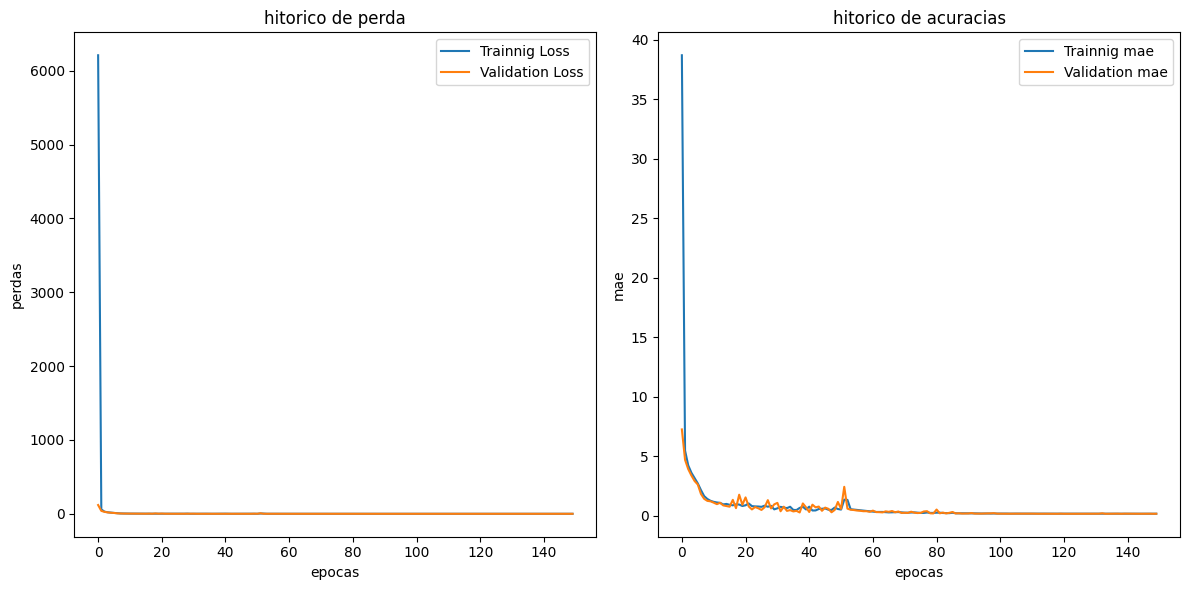

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Trainnig Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("hitorico de perda")
plt.xlabel("epocas")
plt.ylabel("perdas")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["mae"],label="Trainnig mae")
plt.plot(history.history["val_mae"],label="Validation mae")
plt.title("hitorico de acuracias")
plt.xlabel("epocas")
plt.ylabel("mae")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
loss = model.evaluate(x_test,y_test)[0]
print("Loss do modelo {}".format (loss))

82/82 [==============================] - 0s 2ms/step - loss: 0.0430 - mae: 0.1608
Loss do modelo 0.042981021106243134


In [ ]:
Country_encoder.categories_

[array(['Argentina', 'Australia', 'Austria', 'Brazil', 'Bulgaria',
        'Canada', 'Chile', 'China', 'Croatia', 'France', 'Georgia',
        'Germany', 'Greece', 'Hungary', 'Israel', 'Italy', 'Lebanon',
        'Mexico', 'Moldova', 'New Zealand', 'Portugal', 'Romania',
        'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Switzerland',
        'Turkey', 'United States', 'Uruguay', 'unknown'], dtype=object)]

In [ ]:
Region_encoder.categories_

[array(['Aargau', 'Abruzzo', 'Aconcagua', 'Aconcagua Costa',
        'Aconcagua Valley', 'Adelaide Hills', 'Agio Oros',
        'Aglianico del Vulture', 'Agrelo', 'Ahr', 'Ahrweiler', 'Aigle',
        'Alenquer', 'Alentejano', 'Alentejo', 'Alexander Valley',
        'Alghero', 'Alicante', 'Almansa', 'Almeirim', 'Aloxe-Corton',
        'Alsace', 'Amarone della Valpolicella',
        'Amarone della Valpolicella Classico',
        'Amarone della Valpolicella Valpantena', 'Anderson Valley',
        'Aragón', 'Arbois', 'Ardèche', 'Arroyo Seco', 'Aude', 'Baden',
        'Bairrada', 'Bajo Aragón', 'Bandol', 'Barbaresco',
        "Barbera d'Alba", "Barbera d'Asti", 'Barbera del Monferrato',
        'Barbera del Monferrato Superiore', 'Barco Reale di Carmignano',
        'Bardolino', 'Bardolino Classico', 'Bardolino Superiore', 'Barolo',
        'Barossa', 'Barossa Valley', 'Beaujolais', 'Beaujolais-Villages',
        "Beaune 1er Cru 'Aux Cras'", "Beaune 1er Cru 'Champs Pimont'",
        "Beaune

In [ ]:
Winery_encoder.categories_

[array(['14 Hands', '19 Crimes', '4 Kilos Vinícola', ..., 'Áster',
        'Ökonomierat Rebholz', 'Κτημα Τσελεπου (Ktima Tselepos)'],
       dtype=object)]

In [ ]:
pais= str(input("digite um pais: "))
regiao = str(input("digite uma região: "))
vinicola = str(input("digite uma vinicola: "))
preco = float(input("digite o preco: "))
ano = int(input("digite o ano: "))

In [ ]:
pais= "xcvbnm"
regiao = "xcvbnm"
vinicola = "bvvbn"
preco = 20
ano = 2

In [ ]:
pais= "France"
regiao = "Pomerol"
vinicola = "Château La Providence"
preco = 20
ano = 2010

In [ ]:
pais= "France"
regiao = "Pomerol"
vinicola = "Château La Providence"
preco = 70
ano = 2001

In [ ]:
pais= "Italy"
regiao = "Vigneti delle Dolomiti"
vinicola = "Manincor"
preco = 17.5
ano = 2019

In [ ]:
pais= "France"
regiao = "Méditerranée"
vinicola = "Château Camparnaud"
preco = 10.11
ano = 2019

In [ ]:
pais= "xcvbnm"
regiao = "xcvbnm"
vinicola = "bvvbn"
preco = 187.00
ano = 2019

In [ ]:
pais= "xcvbnm"
regiao = "xcvbnm"
vinicola = "bvvbn"
preco = 20
ano = 2019

In [ ]:
try:
  pais_encoder = Country_encoder.transform([[pais]])
except:
  print("Pais desconhecido")
  pais_encoder = Country_encoder.transform([["unknown"]])

try:
  regiao_encoder = Region_encoder.transform([[regiao]])
except:
  print("Região desconhecida")
  regiao_encoder = Region_encoder.transform([["unknown"]])

try:
  vinicola_encoder = Winery_encoder.transform([[vinicola]])
except:
  print("Vinicola desconhecida")
  vinicola_encoder = Winery_encoder.transform([["unknown"]])

ano_encoder = float(2023-ano)

pais_encoder,regiao_encoder,vinicola_encoder,ano_encoder

In [ ]:
entrada_modelo = np.array([[pais_encoder[0][0],regiao_encoder[0][0],vinicola_encoder[0][0],preco,ano_encoder]])
entrada_modelo

In [ ]:
classificacao = model.predict(entrada_modelo)

In [ ]:
round(classificacao[0][0],4)